## Outlier Detection & Handling

### Preprocessing

In [9]:
library(tidyverse)

In [10]:
setwd("/home/asus/content/Notes/Semester 4/FDN Lab/Experiments/Experiment 3")

In [11]:
df_mean <- data.frame(
  ID = c(1, 2, 3, 4, 5, 6, 7, 8, 9, 10),
  Name = c("Alice", "Bob", NA, "David", "Emma", "Frank", NA, "Hannah", "Ian", "Jack"),
  Age = c(25, NA, 30, 29, NA, 35, 40, NA, 50, 27),
  Salary = c(50000, 60000, 55000, NA, 70000, 75000, 80000, 65000, NA, 72000),
  Score = c(80, 90, NA, 85, 88, 92, NA, 77, 95, Inf)
)


Boxplot Visualization to visualize salary data

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_boxplot()`).”


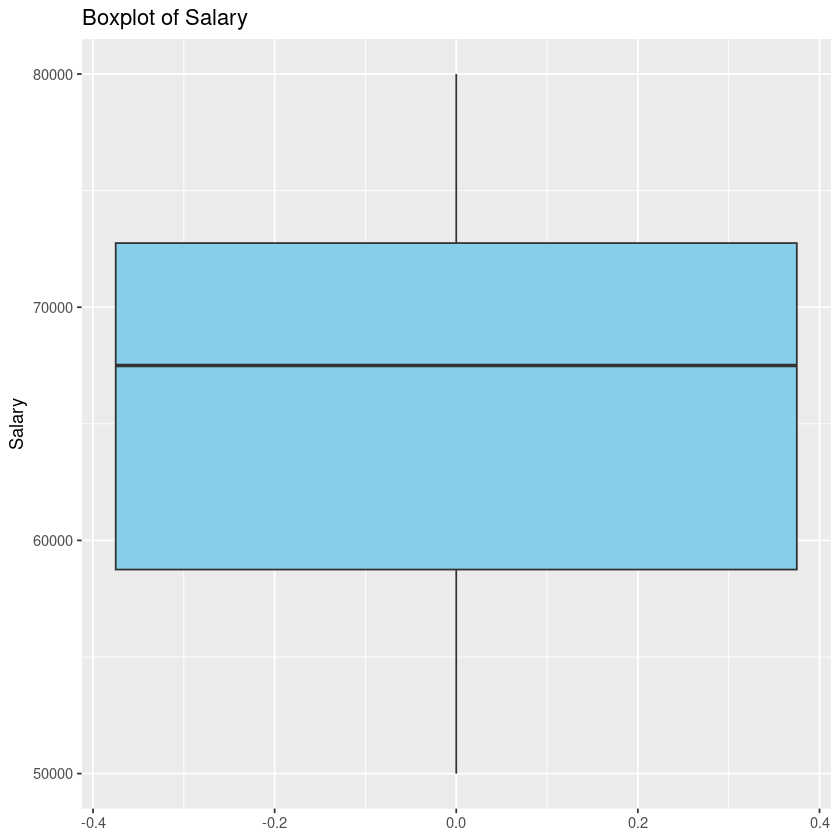

In [12]:
# i. Boxplot Visualization to visualize Salary data
ggplot(df_mean, aes(y = Salary)) +
  geom_boxplot(fill = "skyblue", outlier.color = "red", outlier.shape = 16) +
  labs(title = "Boxplot of Salary", y = "Salary")



Z-Score Method (values outside ±3 standard deviations).

In [13]:
# ii. Z-Score Method (Values outside ±3 standard deviations)
df_mean_z <- df_mean %>%
  mutate(Salary_Z = as.numeric(scale(Salary))) %>%  # Convert scale output to numeric
  filter(abs(Salary_Z) <= 3) %>%  # Remove outliers
  select(-Salary_Z)  # Remove Z-score column
print(df_mean_z)



  ID   Name Age Salary Score
1  1  Alice  25  50000    80
2  2    Bob  NA  60000    90
3  3   <NA>  30  55000    NA
4  5   Emma  NA  70000    88
5  6  Frank  35  75000    92
6  7   <NA>  40  80000    NA
7  8 Hannah  NA  65000    77
8 10   Jack  27  72000   Inf


iii. IQR Method: Remove values outside Q1 - 1.5*IQR and Q3 + 1.5*IQR.

In [15]:
# iii. IQR Method: Remove values outside Q1 - 1.5*IQR and Q3 + 1.5*IQR
Q1 <- quantile(df_mean$Salary, 0.25, na.rm=TRUE)
Q3 <- quantile(df_mean$Salary, 0.75, na.rm=TRUE)
IQR_value <- Q3 - Q1
lower_bound <- Q1 - 1.5 * IQR_value
upper_bound <- Q3 + 1.5 * IQR_value

In [16]:
df_mean_iqr <- df_mean %>%
  filter(Salary >= lower_bound & Salary <= upper_bound)

iv. Winsorization: Replace extreme values with percentiles (Winsorize()).

In [8]:
# iv. Winsorization: Replace extreme values with 5th and 95th percentiles
library(DescTools)
df_mean_winsorized <- df_mean %>%
  mutate(Salary = Winsorize(Salary, probs = c(0.05, 0.95)))

ERROR: [1m[33mError[39m in `mutate()`:[22m
[1m[22m[36mℹ[39m In argument: `Salary = Winsorize(Salary, probs = c(0.05, 0.95))`.
[1mCaused by error in `Winsorize()`:[22m
[33m![39m unused argument (probs = c(0.05, 0.95))


v. Detect & Remove Outliers Using tidyverse (filter())

In [17]:
# v. Detect & Remove Outliers Using tidyverse (filter method)
df_mean_tidy_outliers <- df_mean %>%
  filter(between(Salary, lower_bound, upper_bound))


vi. Detect Outliers in Multiple Columns (apply()).

In [19]:
# vi. Detect Outliers in Multiple Columns using apply() (Z-score method)
detect_outliers <- function(x) {
  if (is.numeric(x)) {
    z_scores <- scale(x)
    return(abs(z_scores) > 3)
  } else {
    return(rep(FALSE, length(x)))
  }
}

outlier_matrix <- apply(df_mean, 2, detect_outliers)
df_mean_clean <- df_mean[!rowSums(outlier_matrix), ]  # Remove rows with outliers


vii. Create a Clean Dataset After Removing Outliers

In [21]:
# vii. Create a Clean Dataset After Removing Outliers
df_mean_final <- df_mean_iqr  # Using IQR method for final clean dataset
write.csv(df_mean_final, "Clean_Dataset.csv", row.names = FALSE)